# Excercise 7: Pandas, Xarray and Cartopy - Working with geospatial data

Jutta Vüllers, contact: jutta.vuellers@kit.edu, Julia Fuchs, contact: julia.fuchs@kit.edu, Annika Bork-Unkelbach, contact: annika.bork-unkelbach@kit.edu


## Learning objectives: 
1. Pandas Data frames
    - Indexing with Pandas
2. Xarray Data sets
    - Plotting with Xarray
    - Indexing with Xarray
3. Plotting with Cartopy


## Exercise 7: submitted by 11.12.22 24:00
   
***

https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html

## Submitted By:
## Name: Sudur Bhattarai  
## Student ID: 2514652 
## Program: M.Sc. in Remote Sensing and Geoinformatics

## 1. Pandas Data frames 

### Example data: Air quality (NO2)
For this tutorial, air quality data (NO2, µg/m³) is used. The air_quality_no2.csv data set provides
NO2 values at 3 measurements stations in Paris, Antwerp and London from May to June 2019. The data format.csv can be read by using pandas and saved as a data frame in "air_quality" that contains a table with 3 columns (one per measurement station) and a datetime index (rows).

### Dataframe operations
Remember, within a pandas Data frame, you can directly use functionalities from other packages:

    - Plotting with matplotlib 
    - Calculations with numpy
    - and more...

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
air_quality = pd.read_csv("D:/MSRSGI/Winter_Semester23_24/Python/Course_Data/air_quality_no2.csv", index_col='datetime', parse_dates=True)

In [42]:
air_quality.head(20)

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
2019-05-07 07:00:00,NaN,72.4,26.0
2019-05-07 08:00:00,NaN,77.7,32.0
2019-05-07 09:00:00,NaN,67.9,32.0
2019-05-07 10:00:00,NaN,56.0,28.0


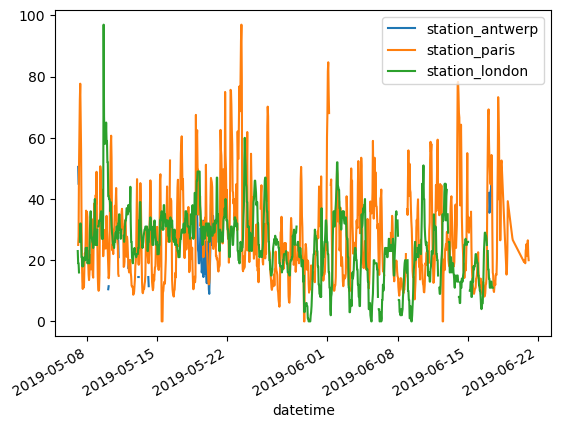

In [10]:
air_quality.plot() # pandas uses labels automatically from the dataframe 
plt.show()

### Indexing with Pandas

The Python and NumPy indexing operators `[]` and attribute operator `.` provide quick and easy access to pandas data structures

Further choices for indexing are `.iloc` and `.loc`

Each column in a DataFrame is a pandas Series. In the following the single column "station_london" is selected in 4 different ways
- `.`
- `[]`
- `.iloc`
- `.loc`

In [11]:
air_quality.station_london.head()

datetime
2019-05-07 02:00:00    23.0
2019-05-07 03:00:00    19.0
2019-05-07 04:00:00    19.0
2019-05-07 05:00:00    16.0
2019-05-07 06:00:00     NaN
Name: station_london, dtype: float64

In [12]:
type(air_quality.station_london)

pandas.core.series.Series

In [13]:
air_quality["station_london"].head()

datetime
2019-05-07 02:00:00    23.0
2019-05-07 03:00:00    19.0
2019-05-07 04:00:00    19.0
2019-05-07 05:00:00    16.0
2019-05-07 06:00:00     NaN
Name: station_london, dtype: float64

In [14]:
air_quality.iloc[:,2].head() # iloc: indexing with the index (integer) : all values of the 3rd column (2 in Python) station_london

datetime
2019-05-07 02:00:00    23.0
2019-05-07 03:00:00    19.0
2019-05-07 04:00:00    19.0
2019-05-07 05:00:00    16.0
2019-05-07 06:00:00     NaN
Name: station_london, dtype: float64

In [15]:
air_quality.loc[:,"station_london"].head() # loc: indexing with labels (here: station label) 


datetime
2019-05-07 02:00:00    23.0
2019-05-07 03:00:00    19.0
2019-05-07 04:00:00    19.0
2019-05-07 05:00:00    16.0
2019-05-07 06:00:00     NaN
Name: station_london, dtype: float64

**DatetimeIndex and selecting time steps**

In [16]:
air_quality.index

DatetimeIndex(['2019-05-07 02:00:00', '2019-05-07 03:00:00',
               '2019-05-07 04:00:00', '2019-05-07 05:00:00',
               '2019-05-07 06:00:00', '2019-05-07 07:00:00',
               '2019-05-07 08:00:00', '2019-05-07 09:00:00',
               '2019-05-07 10:00:00', '2019-05-07 11:00:00',
               ...
               '2019-06-20 17:00:00', '2019-06-20 18:00:00',
               '2019-06-20 19:00:00', '2019-06-20 20:00:00',
               '2019-06-20 21:00:00', '2019-06-20 22:00:00',
               '2019-06-20 23:00:00', '2019-06-21 00:00:00',
               '2019-06-21 01:00:00', '2019-06-21 02:00:00'],
              dtype='datetime64[ns]', name='datetime', length=1035, freq=None)

In [17]:
air_quality.index[4]

Timestamp('2019-05-07 06:00:00')

In [18]:
air_quality["station_paris"][air_quality.index[4]] # selecting a specific value in col station_paris using .index[]

61.9

In [19]:
air_quality.loc['2019-05-07 02:00:00'] # loc: indexing with labels (here: a specific time) 

station_antwerp     NaN
station_paris       NaN
station_london     23.0
Name: 2019-05-07 02:00:00, dtype: float64

In [20]:
air_quality.loc['2019-05-07'] # one specific day

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
2019-05-07 07:00:00,NaN,72.4,26.0
2019-05-07 08:00:00,NaN,77.7,32.0
2019-05-07 09:00:00,NaN,67.9,32.0
2019-05-07 10:00:00,NaN,56.0,28.0


In [21]:
air_quality['2019-06':'2019-08'] # time range between June, July, August 2019

,station_antwerp,station_paris,station_london
datetime,,,
2019-06-01 00:00:00,NaN,68.0,26.0
2019-06-01 01:00:00,NaN,81.7,22.0
2019-06-01 02:00:00,NaN,84.7,22.0
2019-06-01 03:00:00,52.5,74.8,16.0
2019-06-01 04:00:00,NaN,68.1,16.0
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


In [22]:
air_quality.between_time('01:00', '03:00').head() # all data between 1am and 3am

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-08 01:00:00,NaN,34.0,19.0
2019-05-08 02:00:00,NaN,22.1,19.0
2019-05-08 03:00:00,23.0,19.6,20.0


**In order to work with the datetime objects instead of plain text, datetime.index needs to be converted and added as new column to the data_frame as done below**

In [23]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [24]:
air_quality["datetime"] = pd.to_datetime(air_quality.index) # air_quallity.index converted to datetime object and added as a new col

In [25]:
air_quality.head() # column "datetime" is now visible

,station_antwerp,station_paris,station_london,datetime
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,2019-05-07 02:00:00
2019-05-07 03:00:00,50.5,25.0,19.0,2019-05-07 03:00:00
2019-05-07 04:00:00,45.0,27.7,19.0,2019-05-07 04:00:00
2019-05-07 05:00:00,NaN,50.4,16.0,2019-05-07 05:00:00
2019-05-07 06:00:00,NaN,61.9,NaN,2019-05-07 06:00:00


In [26]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 02:00:00'), Timestamp('2019-06-21 02:00:00'))

In [27]:
air_quality["datetime"].max() - air_quality["datetime"].min()
# air_quality.datetime.max() - air_quality.datetime.min() # Same as above

Timedelta('45 days 00:00:00')

In [28]:
# Groupby hour of the day, compute the average for each hour and plot the mean diurnal cycle for Paris

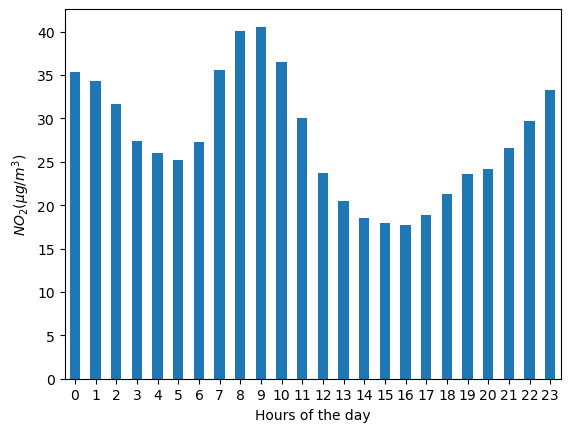

In [29]:
air_quality.groupby([air_quality["datetime"].dt.hour])["station_paris"].mean().plot(kind='bar',rot=0)
plt.xlabel("Hours of the day")
plt.ylabel("$NO_2 (µg/m^3)$")
plt.show()

### **Tasks**:
### Plot the air quality in London and Paris
- Select the data from the 7 -8 May 2019 and plot the air quality for Paris and London in one Figure
- Add title, x- and y-labels to the plot

### Plot the weekly cycle of air pollution
- Groupby weekday and plot the mean weekly cycle for all stations
- Add title, x- and y-labels to the plot

### Task 1: Plot the air quality in London and Paris
- Select the data from the 7 -8 May 2019 and plot the air quality for Paris and London in one Figure
- Add title, x- and y-labels to the plot

In [30]:
# Select the date range and specific stations
selected_data = air_quality.loc['2019-05-07':'2019-05-08', ('station_paris', 'station_london')]
#Display the dataframe selected_data
selected_data

,station_paris,station_london
datetime,,
2019-05-07 02:00:00,NaN,23.0
2019-05-07 03:00:00,25.0,19.0
2019-05-07 04:00:00,27.7,19.0
2019-05-07 05:00:00,50.4,16.0
2019-05-07 06:00:00,61.9,NaN
2019-05-07 07:00:00,72.4,26.0
2019-05-07 08:00:00,77.7,32.0
2019-05-07 09:00:00,67.9,32.0
2019-05-07 10:00:00,56.0,28.0


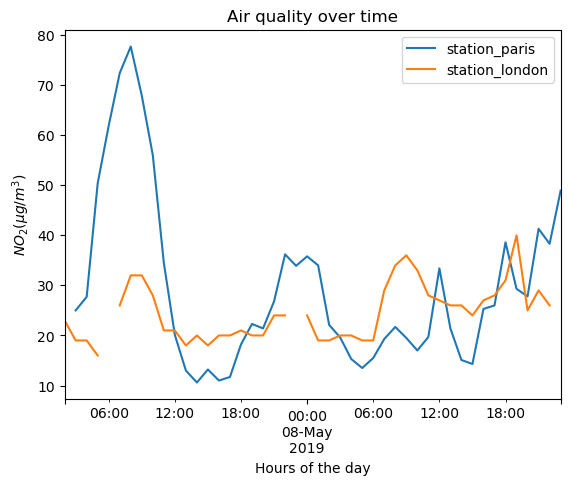

In [31]:
# plt.figure(figsize=(10, 6))
# plt.plot(selected_data.index, selected_data['station_paris'], 'ro-', label="Station Paris", linewidth = '2')
# plt.plot(selected_data.index, selected_data['station_london'], 'bo-', label="Station London", linewidth = '2')

selected_data.plot()

plt.title('Air quality over time')
plt.xlabel("Hours of the day")
plt.ylabel("$NO_2 (µg/m^3)$")
plt.legend()

plt.show()

### Task2: Plot the weekly cycle of air pollution
- Groupby weekday and plot the mean weekly cycle for all stations
- Add title, x- and y-labels to the plot

In [32]:
air_quality

,station_antwerp,station_paris,station_london,datetime
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,2019-05-07 02:00:00
2019-05-07 03:00:00,50.5,25.0,19.0,2019-05-07 03:00:00
2019-05-07 04:00:00,45.0,27.7,19.0,2019-05-07 04:00:00
2019-05-07 05:00:00,NaN,50.4,16.0,2019-05-07 05:00:00
2019-05-07 06:00:00,NaN,61.9,NaN,2019-05-07 06:00:00
...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,2019-06-20 22:00:00
2019-06-20 23:00:00,NaN,24.9,NaN,2019-06-20 23:00:00
2019-06-21 00:00:00,NaN,26.5,NaN,2019-06-21 00:00:00


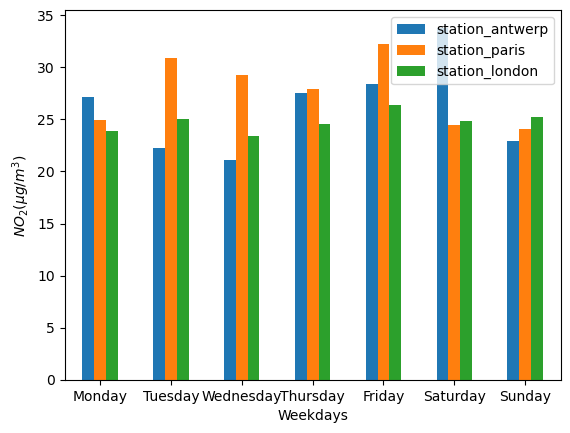

In [39]:
import matplotlib.pyplot as plt
import pandas as pd



# Group by weekday and calculate the mean for all stations
mean_weekly_cycle = air_quality.groupby(air_quality["datetime"].dt.weekday)[["station_antwerp", "station_paris", "station_london"]].mean()

# Plot the mean weekly cycle
# plt.figure(figsize=(20, 6))
mean_weekly_cycle.plot(kind='bar', rot=0)

plt.xlabel("Weekdays")
plt.ylabel("$NO_2 (µg/m^3)$")
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()


## 2. Xarray Data sets

Xarray is a Python library for working with labeled, multi dimensional arrays.

* Built on top of numpy and pandas
* Brings the power of pandas to multidimensional arrays
* Supports data of any dimensionality


### Core Data Structures

Xarray has two main data structures:
* xarray.DataArray: a fancy, labelled version of numpy.ndarray with associated coordinates.
* xarray.Dataset: a collection of multiple xarray.DataArray that share the same coordinates and/or dimensions

Xarray's interface is heavily inspired by the netCDF data model. Xarray's Dataset is designed as an in-memory representation of a netCDF dataset.

In remote sensing projects, you typically have to work with spatial data. As for all things in life, many routes can lead to the goal. Xarray is a fairly newly developed package, that uses all pandas functionality and extends this to multidimensional (spatial) data, which makes working with such data very efficient. To do this, xarray works based on xarray.datasets or xarray.datasets (compared to the dataframes of pandas).

As with Numpy and Pandas, many resources exist for xarray that help solving problems.

### Data can also be stored and loaded with xarray, typically as netcdf (.nc) files, which is a standard filetype in geosciences.

airtemps.to_netcdf('airtemps.nc') # save data

airtemps = xr.open_dataset('airtemps.nc') # load data

airtemps_multi = xr.open_mfdataset('*.nc') # load multiple netCDF files at once

### Here we use a tutorial dataset directly from the xarray package: 

In [3]:
import xarray as xr

# Load exemplary data set
airtemps = xr.tutorial.open_dataset('air_temperature')

# Check out the xarray.Dataset
airtemps

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Dataset

In xarray, data is typically stored in data sets (xarray.Dataset). 
Datasets have the following key properties:

* data_vars: an dictionary of DataArrays corresponding to data variables
* dims: a dictionary mapping from dimenion names to the fixed length of each dimension (e.g. {'time': 1815, 'nv': 2, 'latitude': 180, 'longitude': 360} )
* coords: a dictionary-like container of arrays (coordinates) that label each point (tick label) along our dimensions
* attrs: a dictionary holding arbitrary metadata pertaining to the dataset

https://xarray.pydata.org/en/v0.8.2/generated/xarray.Dataset.html

These data sets can contain one or more variables, which are stored in individual xarray.DataArrays. 

### DataArray

The DataArray is xarray's implementation of a labeled, multi-dimensional array. It has several key properties:

* data: a Duck array (numpy.ndarray or dask.array or sparse or cupy.array holding the array's values).
* dims: dimension names for each axis e.g. (lat, lon, time)
* coords: a dictionary-like container of arrays (coordinates) that label each point (tick label) along our dimensions
* attrs: a dictionary that holds arbitrary attributes/metadata (such as units).
* name: an arbitrary name of the array

https://xarray.pydata.org/en/v0.8.2/api.html#dataarray

In [4]:
# variables that are in our dataset
airtemps.data_vars

Data variables:
    air      (time, lat, lon) float32 ...

This example data set (airtemps) contains one data variable (air) that can be accessed as a DataArray:

In [5]:
airtemps.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [6]:
airtemps.attrs

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

In [7]:
airtemps

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [8]:
airtemps.time

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

### **Task**: Explore all the different key properties for the Dataset airtemp as listed above and get to know the data e.g. airtemps.attrs

### **Answer the following questions**:

1) What are the dimensions of the Dataset? = lat, time, lon
2) How many time steps are contained in the DataArray? = 2920
3) What is the time period of the data? = 2 yrs (the time frame is 2013-01-01 to 2014-12-31 in airtemps dataset )
4) What is the size of the time steps? = 6 hrs

### Plotting with Xarray

With the DataArrays airtemps.air, one can work very similarly as within Panda's functionality for calculations and plots.

The following command creates a spatial visualization of the average temperature (the averaging occurs here along the temporal axis (full time period), as defined by the argument dim='time'). 

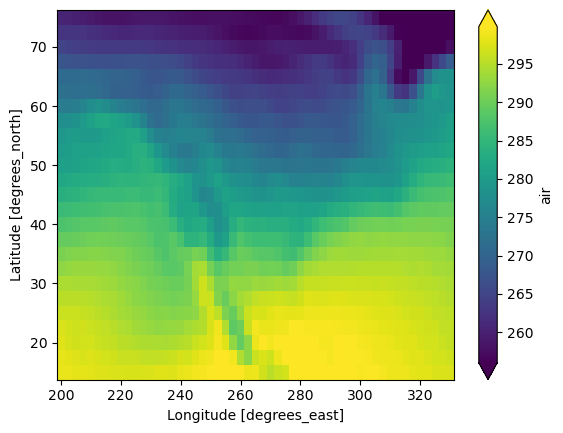

In [85]:
airtemps.air.mean(dim='time').plot(robust=True)

Actually, behind such a Dataarray, a numpy.array is hidden, which can be directly accessed with '.values'.

In [86]:
airtemps.air.values # This way, one can (if so desired) work with the standard numpy syntax.

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

### Indexing with Xarray
https://xarray.pydata.org/en/v0.8.2/indexing.html#

`.isel()` versus `.sel()`

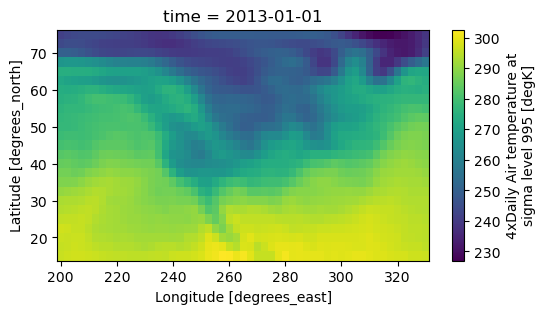

In [87]:
fig = plt.subplots(figsize=(6,3))
airtemps.air.isel(time=0).plot(); plt.show() # 2d plot of the first time step

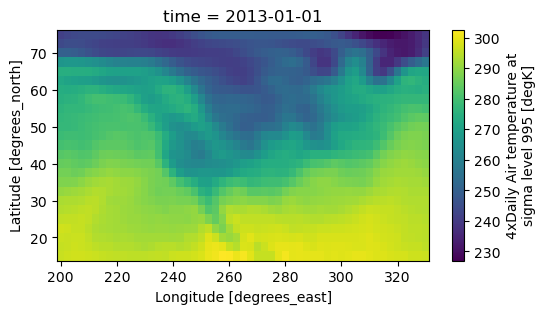

In [88]:
fig = plt.subplots(figsize=(6,3))
airtemps.air.sel(time='2013-01-01T00').plot(); plt.show() # 2d plot of specific time step using label

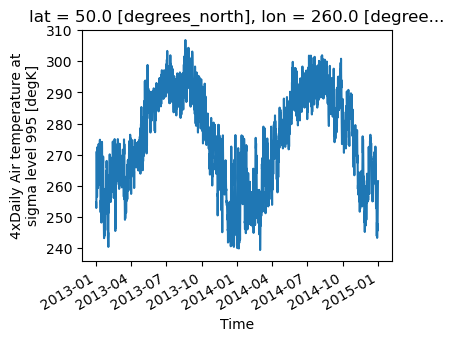

In [89]:
fig = plt.subplots(figsize=(4,3))
airtemps.air.sel(lon=260,lat=50).plot(); plt.show() # Selection of a specific location

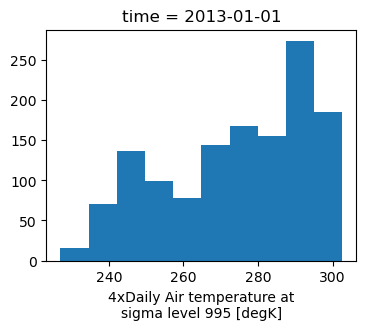

In [90]:
fig = plt.subplots(figsize=(4,3))
airtemps.air.sel(time='2013-01-01T00').plot.hist(); plt.show() # plot a histogram

**Resample()**

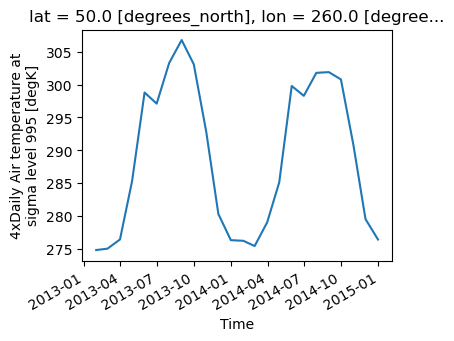

In [91]:
# https://docs.xarray.dev/en/stable/generated/xarray.DataArray.resample.html?highlight=resample#xarray.DataArray.resample

fig = plt.subplots(figsize=(4,3))
airtemps.air.sel(lon=260,lat=50).resample(time='1m').max().plot(); plt.show() # plot monthly maximum temperatures

**Method = 'nearest'**

In [93]:
airtemps.air.sel(lon=360-122.335167,lat=47.608013,method='nearest').mean() # Average temperature for closest pixel to Seattle

<xarray.DataArray 'air' ()>
array(283.39096, dtype=float32)
Coordinates:
    lat      float32 47.5
    lon      float32 237.5

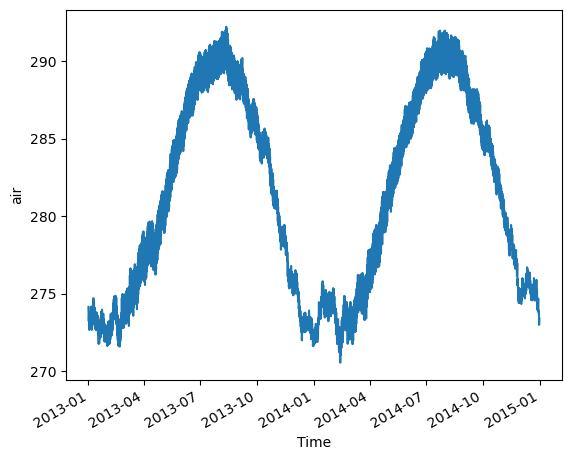

In [94]:
airtemps.air.mean(dim=['lon','lat']).plot(); plt.show() # averaging along two axes (here domain mean)

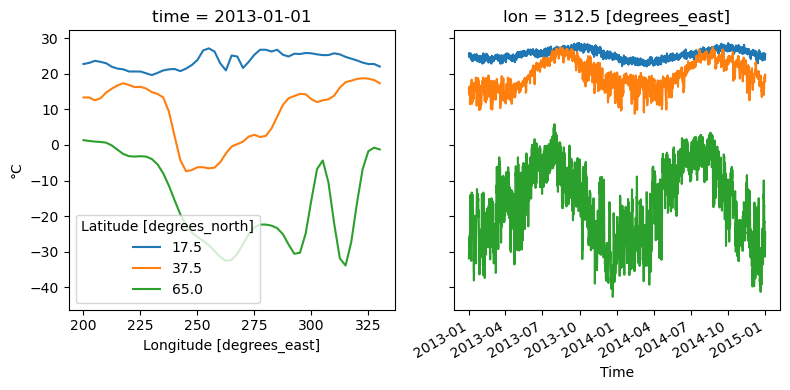

In [95]:
air = airtemps.air - 273.15  # to Celsius

# Prepare the figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Selected latitudes (must be included in air.lat)
sel_lats = [17.5, 37.5, 65.]

# Temperature vs longitude plot - illustrates the "hue" keyword argument
air.sel(time='2013-01-01T00:00:00', lat=sel_lats).plot.line(ax=ax1, hue="lat")
ax1.set_ylabel("°C")

# Temperature vs time plot - illustrates the "x" and "add_legend" keyword arguments
air.sel(lon=312.5, lat=sel_lats).plot.line(ax=ax2, x="time", add_legend=False)
ax2.set_ylabel("")

# Show
plt.tight_layout()

**The Xarray method `Groupby()` works as in Pandas and is very powerful**

https://docs.xarray.dev/en/stable/user-guide/groupby.html?highlight=groupby

https://docs.xarray.dev/en/stable/generated/xarray.plot.imshow.html

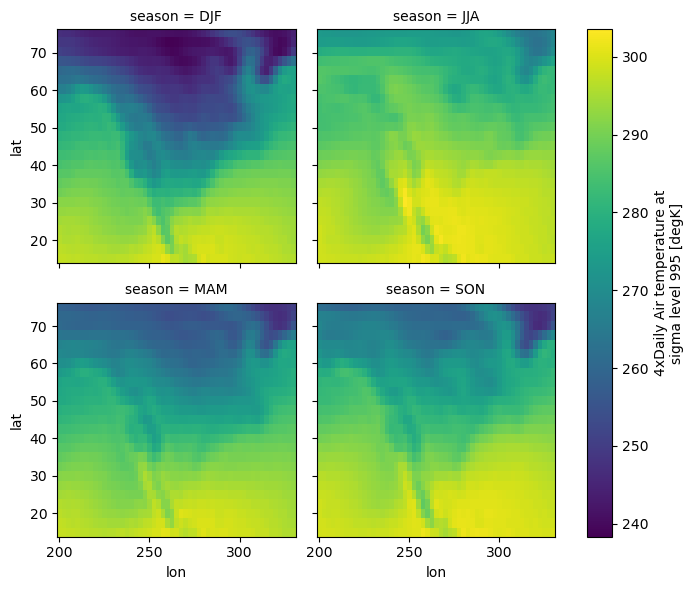

In [96]:
# try to understand what happens here:
airtemps.air.groupby('time.season').mean(dim='time').plot.imshow(col='season', col_wrap = 2)

### **Tasks:** 
### Summer variability
- Plot standard deviation of temperatures during June, July and August using groupy as done above

### Plot June mean, min and max temperatures 
- Create monthly mean, min and max for the month of June and plot it next to each other using 3 axes: 

f, (ax1, ax2, ax3) = plt.subplots(1, 3)

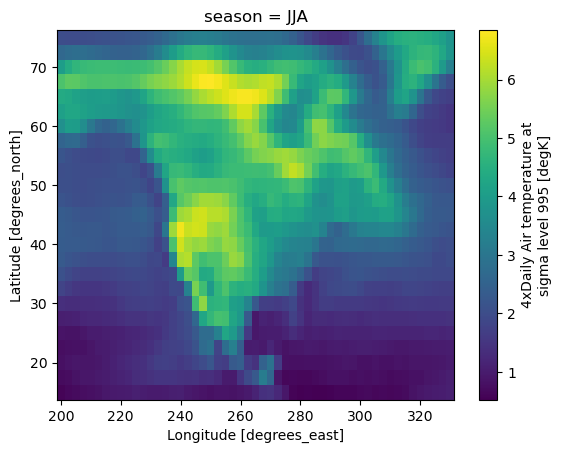

In [9]:
# whole JJA 
# Plot standard deviation of temperatures during June, July and August using groupy
airtemps.air.groupby('time.season').std(dim='time').sel(season = 'JJA').plot(); plt.show()

### Plot standard deviation of temperatures during June, July and August using groupy as done above

In [9]:
airtemps.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [10]:
airtemps.air.groupby('time.month').std(dim='time')

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[5.8476877 , 5.610264  , 5.413778  , ..., 3.8533452 ,
         3.8592842 , 4.0140653 ],
        [5.932178  , 5.6383953 , 5.469703  , ..., 4.107066  ,
         4.5166044 , 4.9875226 ],
        [7.645164  , 7.187254  , 6.8033886 , ..., 4.3196115 ,
         4.826527  , 5.2874393 ],
        ...,
        [0.9247376 , 0.98386943, 1.03251   , ..., 0.9485017 ,
         0.93849343, 0.9501498 ],
        [0.6762594 , 0.7658477 , 0.8018412 , ..., 0.99976486,
         1.0430539 , 1.1058626 ],
        [0.5583097 , 0.62512654, 0.65371156, ..., 0.96076775,
         1.0431998 , 1.1251478 ]],

       [[7.9147854 , 7.9007587 , 7.954881  , ..., 4.7263346 ,
         4.691582  , 4.8433447 ],
        [8.099335  , 8.032352  , 8.104069  , ..., 4.448335  ,
         4.6601367 , 5.06827   ],
        [7.9064965 , 7.6478057 , 7.6038117 , ..., 4.08403   ,
         4.20815   , 4.5236545 ],
...
        [1.0042754 , 0.9871342 , 0.96975905, ..., 0.82251453,
         0.88153845, 0.9761302 ],
        [0.85350925, 0.83226657, 0.77956825, ..., 0.76079804,
         0.8324179 , 0.95339155],
        [0.73123485, 0.72159004, 0.6175809 , ..., 0.702887  ,
         0.7313918 , 0.8192832 ]],

       [[5.788874  , 5.7689595 , 5.7585845 , ..., 5.173339  ,
         5.30632   , 5.627238  ],
        [6.908896  , 6.721077  , 6.516479  , ..., 5.296495  ,
         5.745291  , 6.2226214 ],
        [8.000153  , 7.720217  , 7.4240527 , ..., 6.260368  ,
         6.6650205 , 6.8430233 ],
        ...,
        [1.0781256 , 0.9838778 , 0.91771215, ..., 0.88882166,
         1.0094941 , 1.1926697 ],
        [0.83201534, 0.7027073 , 0.7066848 , ..., 0.86346245,
         0.99874705, 1.2087413 ],
        [0.6593136 , 0.63606095, 0.64253145, ..., 0.85374177,
         0.97913855, 1.0713079 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Plot  of June (month = 6) 

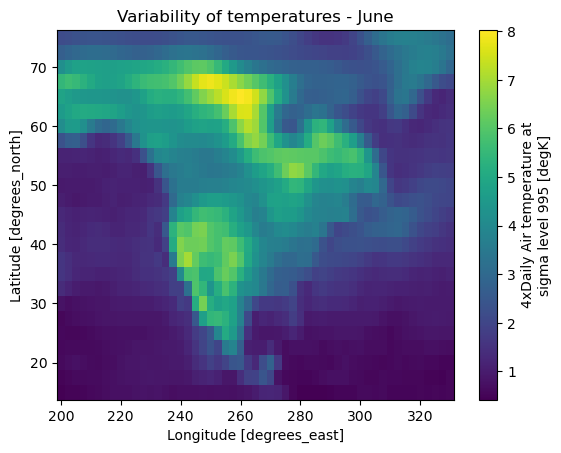

In [13]:
airtemps.air.groupby('time.month').std(dim='time').sel(month=6).plot(); 
plt.title("Variability of temperatures - June")
plt.show()

### Plot of July

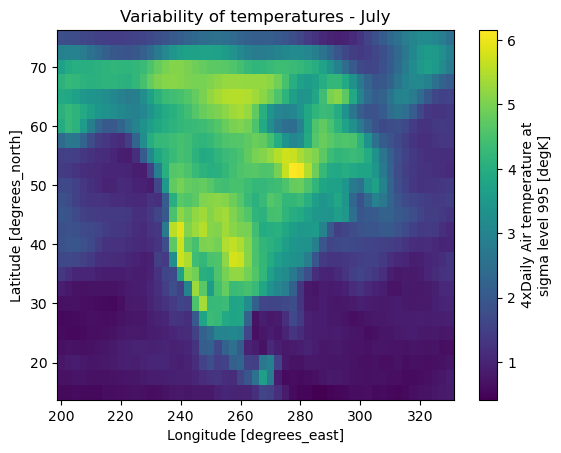

In [14]:
airtemps.air.groupby('time.month').std(dim='time').sel(month=7).plot(); 
plt.title("Variability of temperatures - July")
plt.show()

### Plot of August

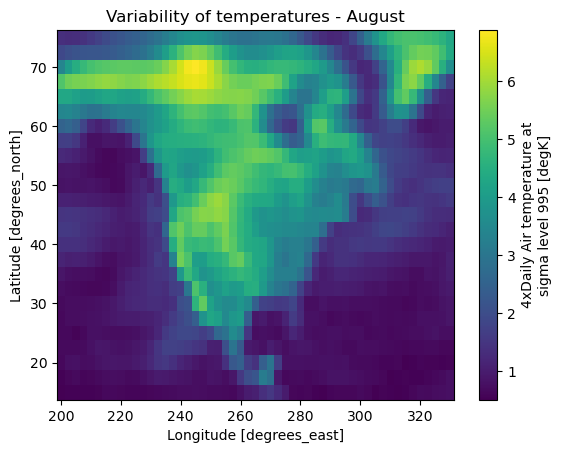

In [15]:
airtemps.air.groupby('time.month').std(dim='time').sel(month=8).plot(); 
plt.title("Variability of temperatures - August")
plt.show()

### Task2: Plot June mean, min and max temperatures 
- Create monthly mean, min and max for the month of June and plot it next to each other using 3 axes: 

f, (ax1, ax2, ax3) = plt.subplots(1, 3)

In [16]:
airtemps.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

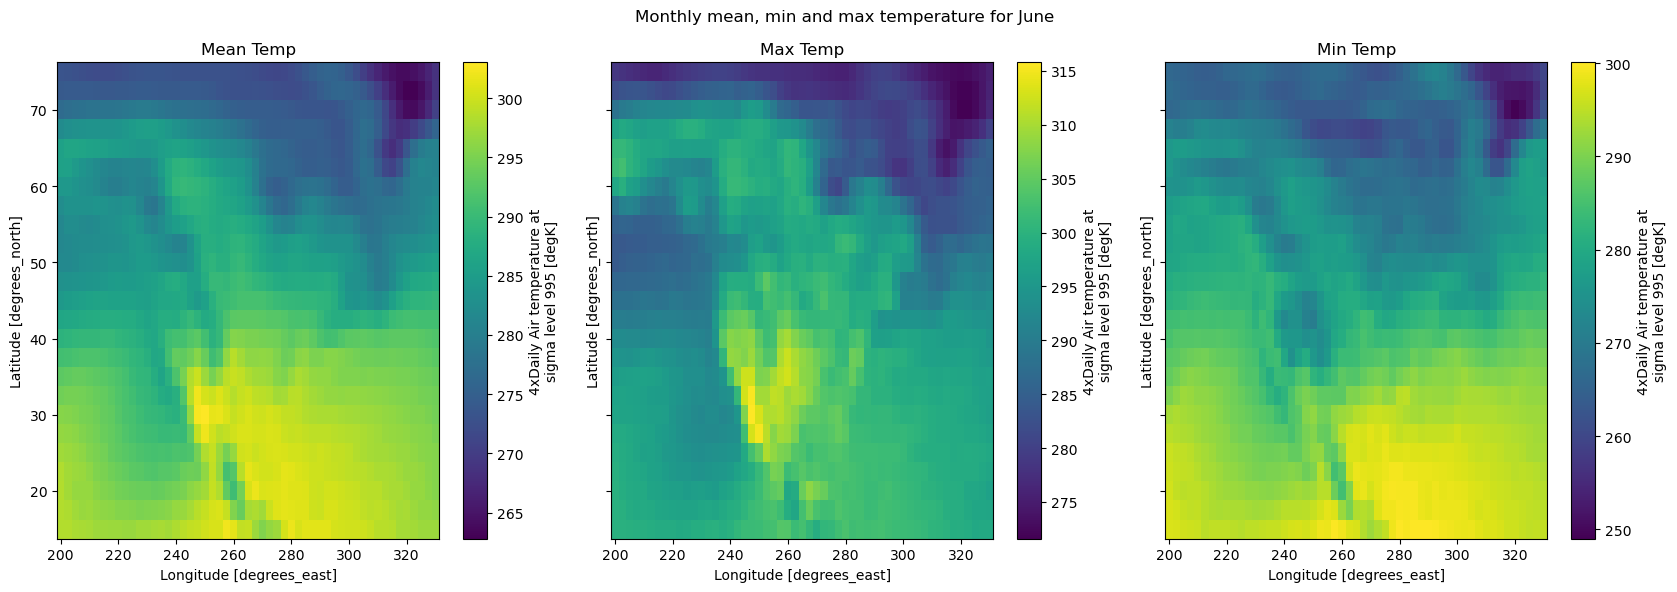

In [17]:
# Prepare the figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6), sharey=True)
plt.suptitle("Monthly mean, min and max temperature for June")

airtemps.air.groupby('time.month').mean(dim='time').sel(month = 6).plot(ax=ax1)
ax1.set_title("Mean Temp")

airtemps.air.groupby('time.month').max(dim='time').sel(month = 6).plot(ax=ax2)
ax2.set_title("Max Temp")

airtemps.air.groupby('time.month').min(dim='time').sel(month = 6).plot(ax=ax3)
ax3.set_title("Min Temp")

# Show
plt.tight_layout()
plt.show()

### 3. Plotting with Cartopy
https://scitools.org.uk/cartopy/docs/latest/gallery/index.html

You will prob. have to install cartopy into your virtual environment using `conda install -c conda-forge cartopy`

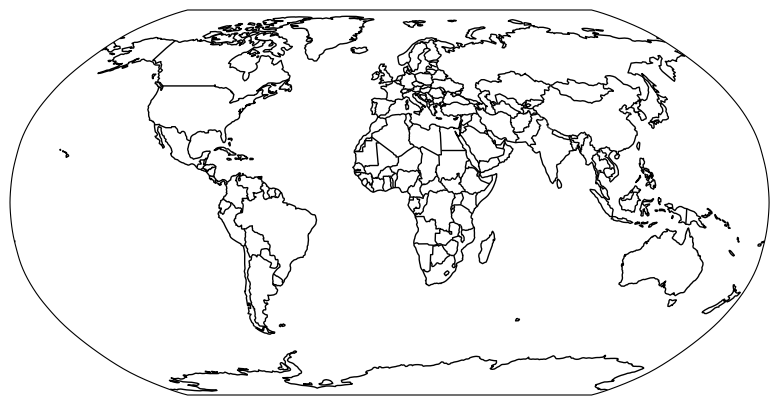

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
ax = plt.axes(projection = ccrs.Robinson())
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
# Make figure larger
plt.gcf().set_size_inches(10, 5)

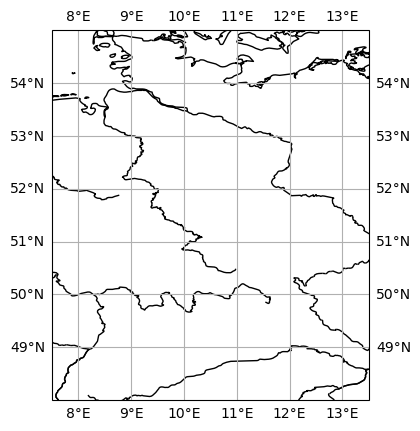

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
ax = plt.axes(projection = ccrs.PlateCarree())

# Add coaslines 
ax.add_feature(cf.COASTLINE)

# Add borders
ax.add_feature(cf.BORDERS)

# Add grid lines 
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

# Add rivers 
rivers = cf.NaturalEarthFeature(
category='physical', name='rivers_lake_centerlines',
scale='10m', facecolor='none', edgecolor='k')
ax.add_feature(rivers, linewidth=1)

# Select regions of interest
ax.set_extent([7.5, 13.5, 48, 55])

# Make figure larger
# plt.gcf().set_size_inches(20, 10)

### **Task:** Plot the average temperature into a nice map

- adjusted colorbar (use 'robust=True' or 'vmin=X, vmax=X')
- title
- gridlines
- x/y-label: latitude, longitude
- borders, coastline

In [39]:
airtemps

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

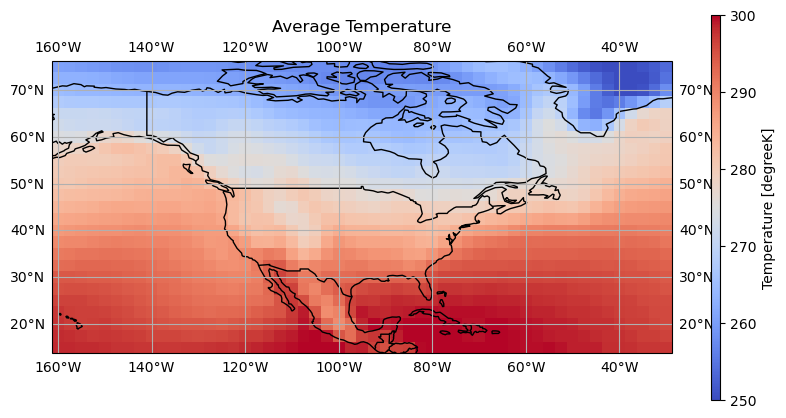

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

# Create a Plate Carrée projection
projection = ccrs.PlateCarree()

# Create a figure and axis with Plate Carrée projection
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 5))

# Add coastlines, borders, and gridlines
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
# ax.set_global()

# Plotting the average temperature with explicit vmin and vmax
vmin_value = 250  
vmax_value = 300

# im = ax.pcolormesh(airtemps.lon, airtemps.lat, airtemps.air.mean(dim="time"), transform=ccrs.PlateCarree(), shading='auto', cmap='viridis', vmin=vmin_value, vmax=vmax_value)
im = ax.pcolormesh(airtemps.lon, airtemps.lat, airtemps.air.mean(dim="time"), transform=ccrs.PlateCarree(), shading='auto', cmap=plt.cm.coolwarm, vmin=vmin_value, vmax=vmax_value)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, aspect=40)
cbar.set_label('Temperature [degreeK]')

# Add title
plt.title('Average Temperature')

# # Set x and y labels
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# Show the plot
plt.show()